In [1]:
import pandas as pd
import numpy as np

- Créer un dataframe pandas qui contient tous les matchs du PSG (possibilité de choisir un autre club), leur nombre de buts marqués et encaissés, indexés par date.

In [2]:
filenames = ["season-0910_csv.csv","season-1011_csv.csv","season-1112_csv.csv","season-1213_csv.csv",
             "season-1314_csv.csv","season-1415_csv.csv","season-1516_csv.csv","season-1617_csv.csv",
             "season-1718_csv.csv","season-1819_csv.csv"]

In [3]:
df_all_games = pd.concat( [ pd.read_csv(f,index_col = "Date") for f in filenames ] )

In [4]:
df_all_games

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA
Date,,,,,,,,,,,,,,,,,,,,,
2009-08-08,F1,Auxerre,Sochaux,0,1,A,0.0,1.0,A,12.0,...,1.46,1.42,2.90,2.64,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-08,F1,Grenoble,Marseille,0,2,A,0.0,1.0,A,6.0,...,1.99,1.96,1.95,1.91,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-08,F1,Le Mans,Lyon,2,2,D,1.0,1.0,D,8.0,...,2.65,2.50,1.53,1.46,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-08,F1,Monaco,Toulouse,1,0,H,1.0,0.0,H,11.0,...,1.74,1.65,2.20,2.14,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-08,F1,Montpellier,Paris SG,1,1,D,0.0,0.0,D,10.0,...,2.30,2.18,1.63,1.58,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/05/2019,F1,Nantes,Strasbourg,0,1,A,0.0,0.0,D,21.0,...,2.25,2.19,1.75,1.71,1.71,4.18,4.89,2.01,3.72,3.85
24/05/2019,F1,Nice,Monaco,2,0,H,1.0,0.0,H,8.0,...,1.73,1.68,2.26,2.22,3.31,3.52,2.28,3.41,3.46,2.25
24/05/2019,F1,Nimes,Lyon,2,3,A,2.0,1.0,H,17.0,...,1.86,1.82,2.10,2.03,3.25,4.12,2.10,3.87,4.40,1.85


In [5]:
# On filtre notre dataset pour n'afficher que les matchs du PSG

df_psg = df_all_games.query('HomeTeam == "Paris SG" | AwayTeam == "Paris SG"')
df_psg

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA
Date,,,,,,,,,,,,,,,,,,,,,
2009-08-08,F1,Montpellier,Paris SG,1,1,D,0.0,0.0,D,10.0,...,2.30,2.18,1.63,1.58,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-15,F1,Paris SG,Le Mans,3,1,H,1.0,1.0,D,13.0,...,1.20,1.18,4.60,4.31,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-22,F1,Valenciennes,Paris SG,2,3,A,0.0,1.0,A,20.0,...,2.45,2.32,1.60,1.53,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-30,F1,Paris SG,Lille,3,0,H,1.0,0.0,H,10.0,...,1.32,1.29,3.75,3.28,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-13,F1,Monaco,Paris SG,2,0,H,0.0,0.0,D,13.0,...,2.10,1.97,1.87,1.80,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/04/2019,F1,Montpellier,Paris SG,3,2,H,1.0,1.0,D,15.0,...,2.01,1.95,1.93,1.90,3.93,3.91,1.93,4.89,4.09,1.72
04/05/2019,F1,Paris SG,Nice,1,1,D,0.0,0.0,D,17.0,...,1.72,1.66,2.40,2.21,NaN,NaN,NaN,1.17,9.03,14.05
11/05/2019,F1,Angers,Paris SG,1,2,A,0.0,1.0,A,14.0,...,2.05,1.98,1.91,1.86,5.62,4.65,1.57,5.86,4.53,1.56


In [6]:
# On affiche tous les matchs du PSG, leur nombre de buts marqués et encaissés, indexés par date
df1 = df_psg.loc[:,["HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR"]]

In [7]:
df1

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
Date,,,,,
2009-08-08,Montpellier,Paris SG,1,1,D
2009-08-15,Paris SG,Le Mans,3,1,H
2009-08-22,Valenciennes,Paris SG,2,3,A
2009-08-30,Paris SG,Lille,3,0,H
2009-09-13,Monaco,Paris SG,2,0,H
...,...,...,...,...,...
30/04/2019,Montpellier,Paris SG,3,2,H
04/05/2019,Paris SG,Nice,1,1,D
11/05/2019,Angers,Paris SG,1,2,A


In [8]:
df_psg

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA
Date,,,,,,,,,,,,,,,,,,,,,
2009-08-08,F1,Montpellier,Paris SG,1,1,D,0.0,0.0,D,10.0,...,2.30,2.18,1.63,1.58,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-15,F1,Paris SG,Le Mans,3,1,H,1.0,1.0,D,13.0,...,1.20,1.18,4.60,4.31,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-22,F1,Valenciennes,Paris SG,2,3,A,0.0,1.0,A,20.0,...,2.45,2.32,1.60,1.53,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-30,F1,Paris SG,Lille,3,0,H,1.0,0.0,H,10.0,...,1.32,1.29,3.75,3.28,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-13,F1,Monaco,Paris SG,2,0,H,0.0,0.0,D,13.0,...,2.10,1.97,1.87,1.80,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/04/2019,F1,Montpellier,Paris SG,3,2,H,1.0,1.0,D,15.0,...,2.01,1.95,1.93,1.90,3.93,3.91,1.93,4.89,4.09,1.72
04/05/2019,F1,Paris SG,Nice,1,1,D,0.0,0.0,D,17.0,...,1.72,1.66,2.40,2.21,NaN,NaN,NaN,1.17,9.03,14.05
11/05/2019,F1,Angers,Paris SG,1,2,A,0.0,1.0,A,14.0,...,2.05,1.98,1.91,1.86,5.62,4.65,1.57,5.86,4.53,1.56


- Utiliser la bibliothèque de votre choix pour créer une fonction qui prédit le score du prochain match du PSG.

In [9]:
import matplotlib.pyplot as plt


In [10]:
#c'est intéressant de regarder le nombre de victoires, de défaites et de matchs nuls entre 2009 et 2019
def displayWinsPSG(home,draw,away):

    for m in range(380):
        if df_psg['HomeTeam'][m] == 'Paris SG':
            if df_psg['FTR'][m] == "H":
                home = home+1
            if df_psg['FTR'][m] == "D":
                draw = draw+1
        else:
            if df_psg['AwayTeam'][m] == 'Paris SG':
                if df_psg['FTR'][m] == "A":
                    away = away+1
                if df_psg['FTR'][m] == "D":
                    draw = draw+1
    print("Résultats du PSG : \n")
    print("Victoire à domicile : ", home, " Victoire à l'extérieur : ",away, " Matchs nuls : ", draw)
    return home, away, draw

Résultats du PSG : 

Victoire à domicile :  137  Victoire à l'extérieur :  104  Matchs nuls :  85


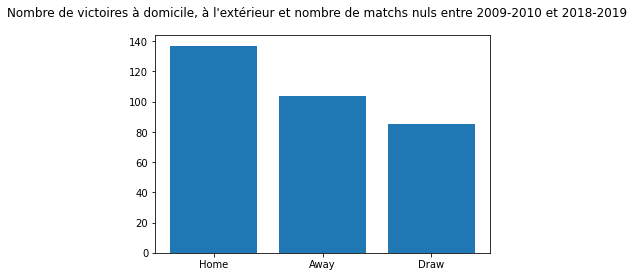

In [11]:
home = 0
draw = 0
away = 0
home,away,draw = displayWinsPSG(home,draw,away)

names = ['Home', 'Away', 'Draw']
values = [home, away, draw]

plt.bar(names, values)
plt.suptitle('Nombre de victoires à domicile, à l\'extérieur et nombre de matchs nuls entre 2009-2010 et 2018-2019')
plt.show()

In [12]:
#L'idée est qu'on voudrait utiliser une loi de poisson pour prédire 
# le score du prochain match du PSG

In [13]:
#On commence par chercher la moyenne de buts en 90 minutes dans un match de ligue 1

In [14]:
df_all_games['total_goals']=df_all_games['FTHG']+df_all_games['FTAG']
print("Moyenne de buts par match en ligue 1 entre 2009 et 2019: ", df_all_games.total_goals.mean())

Moyenne de buts par match en ligue 1 entre 2009 et 2019:  2.517894736842105


In [15]:
# on affiche les données pour mieyux visualiser le nombre de buts

([<matplotlib.axis.XTick at 0x24f4c0b91c0>,
 <a list of 15 Text major ticklabel objects>)

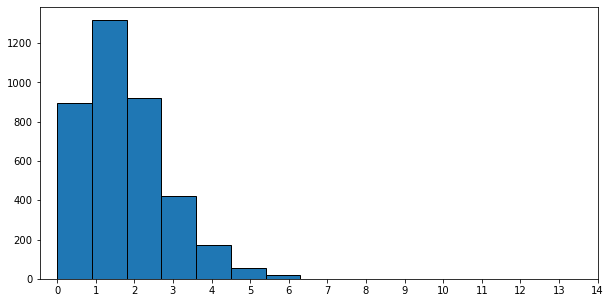

In [16]:
# nombre de buts par l'équipe à domicile
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(df_all_games.FTHG,edgecolor='black')
plt.xticks(range(15))

([<matplotlib.axis.XTick at 0x24f4c0288b0>,
 <a list of 15 Text major ticklabel objects>)

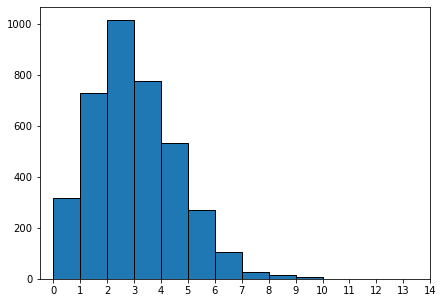

In [17]:
# nombre total de buts dans un match
import matplotlib.pyplot as plt
df_all_games['total_goals']=df_all_games['FTHG']+df_all_games['FTAG']
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
plt.hist(df_all_games.total_goals,edgecolor='black')
plt.xticks(range(15))

In [18]:
# La loi de Poisson : P(x; μ) = (e-μ) (μx) / x!
#lam = 2.517894736842105
from scipy.special import factorial
import numpy as np
#k est ici le nombre de buts dont on voudra calculer la probabilité

def poisson(k,exp_events):
    lam =(exp_events)
    p_k= np.exp(-lam)*np.power(lam,k)/factorial(k)
    #print(f'The probability of {k} goals in {minutes} minutes is {100*p_k:.2f}%.')
    return p_k

In [19]:
#proability of goals acc to poisson distribution
k=[]
p_k=[]
for i in range(10):
    p_k.append(poisson(i,2.517894736842105)*100)
    k.append(i)

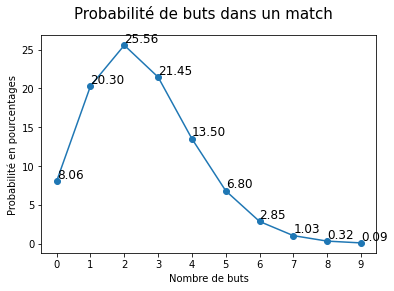

In [20]:
fig = plt.figure()
plt.plot(k,p_k,'o-')
plt.xticks(range(10))
fig.suptitle('Probabilité de buts dans un match',fontsize=15)
plt.xlabel('Nombre de buts')
plt.ylabel('Probabilité en pourcentages')
for x,y in zip(k,p_k):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 fontsize=12)

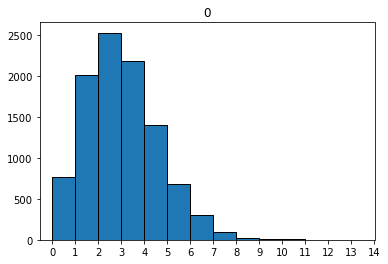

In [21]:
# In 10000 matches simulation goals scored distribution
N=10000
lam=2.517894736842105
counts=np.random.poisson(lam,size=N)
df=pd.DataFrame(counts)
df.hist(bins=11,edgecolor='black')
plt.xticks(range(15))
plt.grid(False)

In [22]:
def p_lessorequal(n_query,exp_events,quiet=True):
    p_n=poisson(np.arange(100),exp_events)
    p=p_n[:n_query+1].sum()
    if quiet:
        return p
    else:
        print(f'Probabilité de marquer {n_query} buts ou moins en un match: {100*p:.2f}%.')
    
def p_greaterorequal(n_query,exp_events,quiet=True):
    p = 1 - p_lessorequal(n_query,exp_events)
    if quiet:
        return p
    else:
        print(f'Probabilité de marquer plus de {n_query} en un match: {100*p:.2f}%.')
 

In [23]:

#probabilité de marquer plus ou moins de buts qu'une certaine valeur 
for i in range(1,10):
    p_lessorequal(i,2,False)

for i in range(1,10):
    p_greaterorequal(i,2,False)



Probabilité de marquer 1 buts ou moins en un match: 40.60%.
Probabilité de marquer 2 buts ou moins en un match: 67.67%.
Probabilité de marquer 3 buts ou moins en un match: 85.71%.
Probabilité de marquer 4 buts ou moins en un match: 94.73%.
Probabilité de marquer 5 buts ou moins en un match: 98.34%.
Probabilité de marquer 6 buts ou moins en un match: 99.55%.
Probabilité de marquer 7 buts ou moins en un match: 99.89%.
Probabilité de marquer 8 buts ou moins en un match: 99.98%.
Probabilité de marquer 9 buts ou moins en un match: 100.00%.
Probabilité de marquer plus de 1 en un match: 59.40%.
Probabilité de marquer plus de 2 en un match: 32.33%.
Probabilité de marquer plus de 3 en un match: 14.29%.
Probabilité de marquer plus de 4 en un match: 5.27%.
Probabilité de marquer plus de 5 en un match: 1.66%.
Probabilité de marquer plus de 6 en un match: 0.45%.
Probabilité de marquer plus de 7 en un match: 0.11%.
Probabilité de marquer plus de 8 en un match: 0.02%.
Probabilité de marquer plus de 9

In [24]:
p_lessorequal(4,2.517894736842105,False)

Probabilité de marquer 4 buts ou moins en un match: 88.88%.


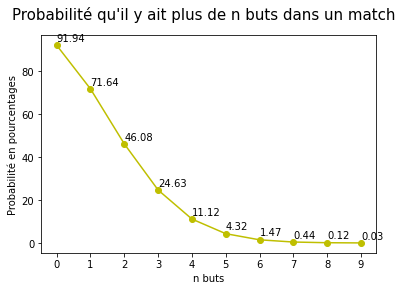

In [25]:
prob=[]
for i in range(10):
    p = p_greaterorequal(i,2.517894736842105,True)
    prob.append(p*100)
fig = plt.figure()
plt.plot(k,prob,'o-y')
plt.xticks(range(10))
fig.suptitle("Probabilité qu'il y ait plus de n buts dans un match",fontsize=15)
plt.xlabel("n buts")
plt.ylabel('Probabilité en pourcentages')
for x,y in zip(k,prob):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='left',fontsize=10)
plt.grid(False)

In [26]:
#prediction du score via la loi de poisson

In [27]:
import pandas as pd
import numpy as np
from scipy import stats 

def PredictScore():
    
    try:
        ht = input("Entrez une équipe de ligue 1 à domicile : ")
        at = input("Entrez une équipe de ligue 1 à l'extérieur : ")
            
        if len(df_all_games[(df_all_games.HomeTeam ==ht) & (df_all_games.AwayTeam ==at)]) > 5:
            
            avg_home_score = df_all_games[(df_all_games.HomeTeam ==ht) & (df_all_games.AwayTeam ==at)].FTHG.mean()
            avg_away_score = df_all_games[(df_all_games.HomeTeam ==ht) & (df_all_games.AwayTeam ==at)].FTAG.mean()
            
            home_goal = int(stats.mode(np.random.poisson(avg_home_score,100000))[0])                    
            away_goal = int(stats.mode(np.random.poisson(avg_away_score,100000))[0])

        else:
            avg_home_goal_conceded = df_all_games[(df_all_games.HomeTeam ==ht)].FTAG.mean()
            avg_away_goal_scored   = df_all_games[(df_all_games.AwayTeam ==at)].FTAG.mean()
            away_goal = int(stats.mode(np.random.poisson(1/2*(avg_home_goal_conceded+avg_away_goal_scored),100000))[0])

            avg_away_goal_conceded = df_all_games[(df_all_games.HomeTeam ==at)].FTHG.mean()
            avg_home_goal_scored   = df_all_games[(df_all_games.AwayTeam ==ht)].FTHG.mean()
            home_goal = int(stats.mode(np.random.poisson(1/2*(avg_away_goal_conceded+avg_home_goal_scored),100000))[0])
            
        avg_total_score = int(stats.mode(
            np.random.poisson((df_all_games[(df_all_games.HomeTeam ==ht) & (df_all_games.AwayTeam ==at)].total_goals.mean()),100000))[0])
        
        print(f'Nombre de buts attendus {avg_total_score}')
        print(f'Il y a eu {len(df_all_games[(df_all_games.HomeTeam ==ht) & (df_all_games.AwayTeam ==at)])} matchs entre 2009-2010 et 2018-2019')
        print(f'Le score est : {ht} {home_goal}:{away_goal} {at}')
    except:
        print("Equipe introuvable. Veuillez réessayer")

In [32]:
PredictScore()

Nombre de buts attendus 1
Il y a eu 2 matchs entre 2009-2010 et 2018-2019
Le score est : Strasbourg 1:1 Nice
